# ***Rukmini Bugga***

## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading and Display Dataset**

In [ ]:
#Load the data in csv format
dataset = pd.read_csv('http://bit.ly/w-data') 
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Exploring the Dataset**

In [ ]:
#Print the shape of the dataset
print("Shape: ",dataset.shape)

Shape:  (25, 2)


In [ ]:
#Describe some basic aspects
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Pre-Processing Data**

In [ ]:
# Pre-process as it will be easier to pass the data into linear regression functions readily
# X is the feature for Linear Regression
# Y is the response for Linear Regression
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Plotting Data**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


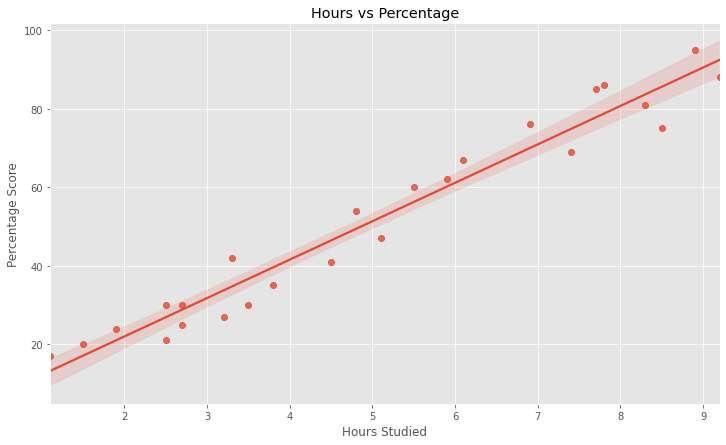

In [ ]:
#Plot the data to see if there is any kind of relation in them or not
plt.figure(figsize=(12,7))
plt.style.use('ggplot')
sns.regplot(X,y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## **Plotting Heatmap**

In [ ]:
#Find the correlation matrix of the data
corr = dataset.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


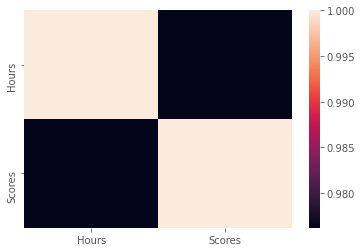

In [ ]:
#Plot the heatmap
sns.heatmap(corr)

## **Splitting the Data**

In [ ]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Train the Linear Model**

In [ ]:
#Import the LinearRegression from sklearn.linear_model
#Create Linear Regression object
#Fit the train set
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Plotting the Regression Line**

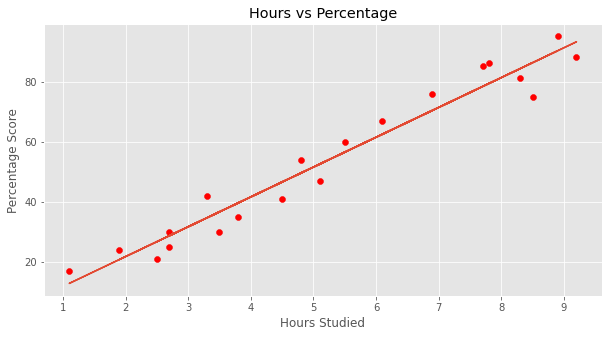

In [ ]:
#Plot for the test data
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, reg.predict(X_train))
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

## **Checking Accuracy**

In [ ]:
#Find the Mean Square Error and the Root Mean Squared Error
y_pred = reg.predict(X_test)
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373


In [ ]:
#Use k folds cross validation to check the accuracy by using 3 folds
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 3)
print("Accuracy: {} %".format(accuracy.mean()*100))
print("Standard Deviation: {} %".format(accuracy.std()*100))

Accuracy: 94.28446204315809 %
Standard Deviation: 0.6771370689833804 %


## **Model Predicted Values**

In [ ]:
h = float(input('Enter number of hours studied: '))
pred=reg.predict([[h]])
print("Predicted Score by the model = {}%".format(pred[0]))

Enter number of hours studied: 8
Predicted Score by the model = 81.30341188657258%
